# OpenCV Library Overview

📌 OpenCV (Open Source Computer Vision Library) is an open source computer vision and machine learning software library. OpenCV was built to provide a common infrastructure for computer vision applications and to accelerate the use of machine perception in the commercial products.

📌 In this section, we will learn some functions used in the OpenCV library in colab.

* Show Image
* Change RGB to Gray scale
* Write Image
* Read Gray Image
* Edit Image
* Read and Write Image
* Mergin Two Image
* Image Pixel Values Statistics
* Create Black and White Picture
* Normalization Pciture Pixel
* Image Flip
* Draw Geometry
* Thresholding
* HSV Color
* Geometric
* ROI (Region of Intereset)
* Histogram
* Equal Histogram
* Histogram Comparision
* Bilateral Filter
* Edge Filtering
* Sobel Filter
* Canny Edge Detection
* OTSU Thresholding
* Gaussian Blur
* Image Contours
* Hoffman Line Detection
* Probability Hoffman Line Detection
* Hoffman Circle Detection
* Adding Noise to an Image
* Image Sharpening
* Harris Corner Detection
* Shi Thomas Corner Detection
* Sub Pixel Corner Detection
* HOG(Histogram of Oriented Gradients) Pedestrian Detection

## Import Necessary Libraries

In [1]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

## Show Image

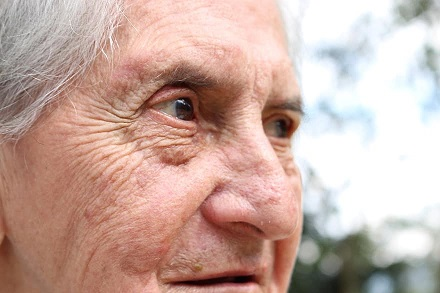

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/datasets/OpenCV-pic/"
img = cv.imread(path + "women-face.jpg")
cv2_imshow(img)

## Change RGB to Gray scale

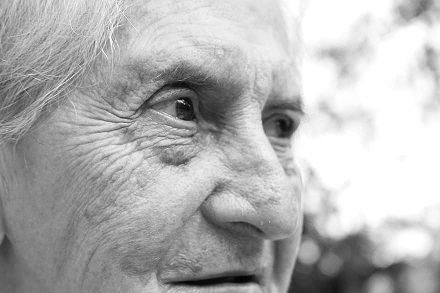

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/datasets/OpenCV-pic/"
img = cv.imread(path + "women-face.jpg")
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

## Write Image

In [ ]:
cv.imwrite("women_face_gray.png", gray_img)

True

## Read Gray Image

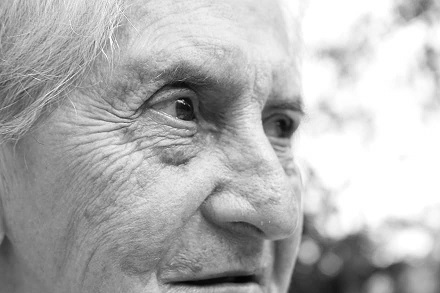

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/datasets/OpenCV-pic/"
img = cv.imread(path + "women-face.jpg", cv.IMREAD_GRAYSCALE)
cv2_imshow(img)

## Edit Image

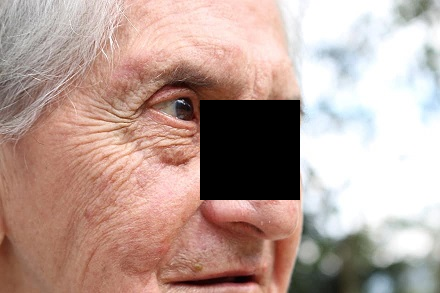

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/datasets/OpenCV-pic/"
img = cv.imread(path + "women-face.jpg")
img_copy = np.copy(img)
img_copy[100:200, 200:300, :] = 0
cv2_imshow(img_copy)


## Read and Write Image

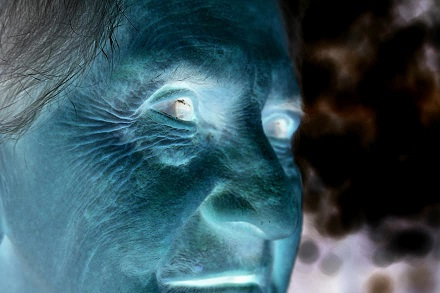

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/datasets/OpenCV-pic/"
img = cv.imread(path + "women-face.jpg")
h, w, ch = img.shape
for row in range(h):
  for col in range(w):
    b, g, r = img[row, col]
    b = 255 - b
    g = 255 - g
    r = 255 - r
    img[row, col] = [b, g, r]

cv2_imshow(img)

## Mergin Two Image

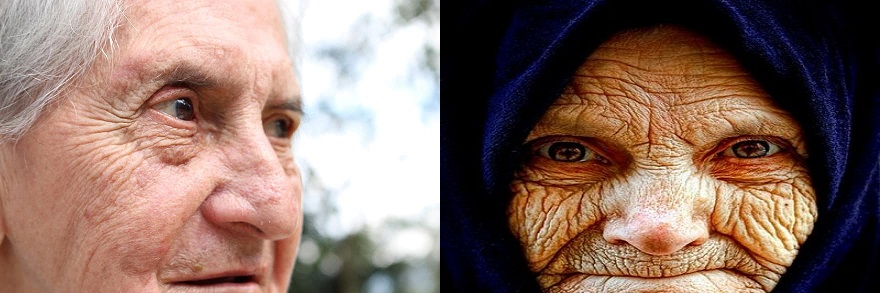

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/datasets/OpenCV-pic/"
img1 = cv.imread(path + "women-face.jpg")
img2 = cv.imread(path + "gm-face.jpg")
merge_image = np.hstack((img1, img2))
cv2_imshow(merge_image)

## Image Pixel Values Statistics

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/datasets/OpenCV-pic/"
img = cv.imread(path + "women-face.jpg", cv.IMREAD_GRAYSCALE)
min_value, max_value, min_loc, max_loc = cv.minMaxLoc(img)
means, stdDev = cv.meanStdDev(img)
print("Min value: {0} , Max value: {1} , \nMin loc: {2} , Max loc: {3}".format(min_value, max_value, min_loc, max_loc))
print("mean: {0} , std: {1}".format(means[0], stdDev[0]))

Min value: 1.0 , Max value: 255.0 , 
Min loc: (240, 281) , Max loc: (290, 0)
mean: [178.22330127] , std: [56.91092591]


## Create Black and White Picture

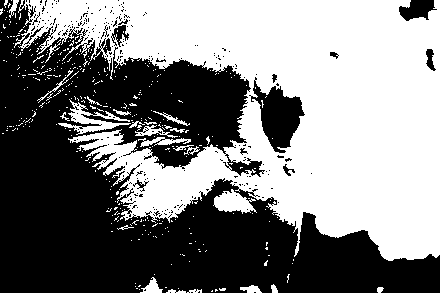

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/datasets/OpenCV-pic/"
img = cv.imread(path + "women-face.jpg", cv.IMREAD_GRAYSCALE)
means, stdDev = cv.meanStdDev(img)
img[np.where(img < means)] = 0
img[np.where(img > means)] = 255
cv2_imshow(img)

## Normalization Pciture Pixel

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/datasets/OpenCV-pic/"
img = cv.imread(path + "women-face.jpg")
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_img = np.float32(gray_img)
print(gray_img)

[[165. 171. 171. ... 200. 201. 204.]
 [169. 172. 175. ... 201. 202. 202.]
 [167. 168. 176. ... 203. 203. 200.]
 ...
 [ 98.  99. 101. ... 112. 109. 103.]
 [100. 101. 102. ... 110. 107. 101.]
 [102. 102. 102. ... 107. 104.  98.]]


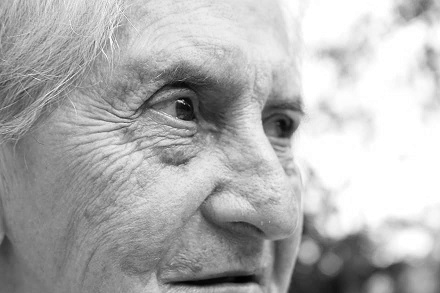

In [ ]:
## MinMax Normalization
dst = np.zeros(gray_img.shape, dtype=np.float32)
cv.normalize(gray_img, dst=dst, alpha=0, beta=1.0, norm_type=cv.NORM_MINMAX)
cv2_imshow(np.uint(dst*255))

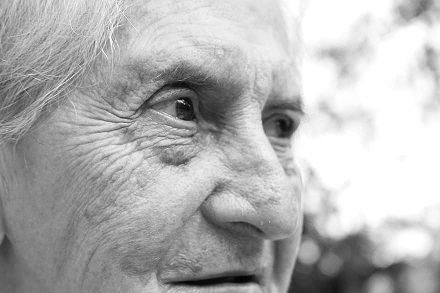

In [ ]:
## Norm Inf Normalization
dst = np.zeros(gray_img.shape, dtype=np.float32)
cv.normalize(gray_img, dst=dst, alpha=1.0, beta=0, norm_type=cv.NORM_INF)
cv2_imshow(np.uint(dst*255))

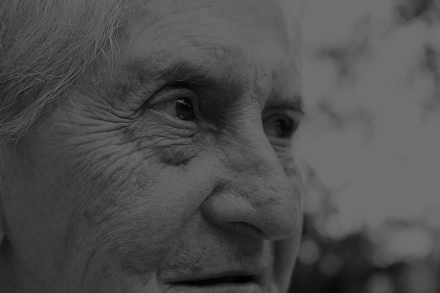

In [ ]:
## Norm L1 Normalization
dst = np.zeros(gray_img.shape, dtype=np.float32)
cv.normalize(gray_img, dst=dst, alpha=1.0, beta=0, norm_type=cv.NORM_L1)
cv2_imshow(np.uint(dst*10000000))

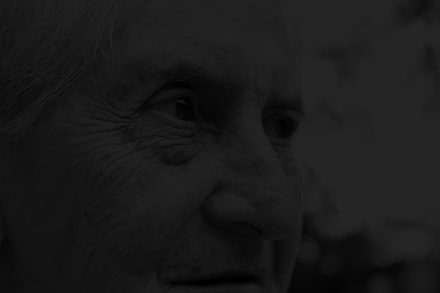

In [ ]:
## Norm L2 Normalization
dst = np.zeros(gray_img.shape, dtype=np.float32)
cv.normalize(gray_img, dst=dst, alpha=1.0, beta=0, norm_type=cv.NORM_L2)
cv2_imshow(np.uint(dst*10000))

## Image Flip

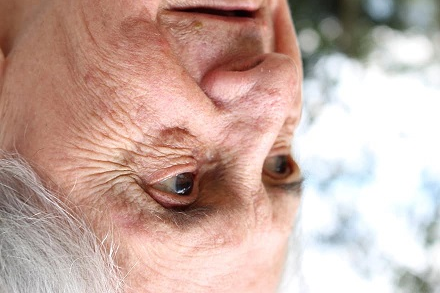

In [ ]:
# X-Flip 0
dst1 = cv.flip(img, 0)
cv2_imshow(dst1)

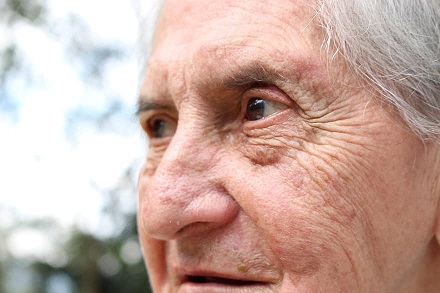

In [ ]:
# Y-Flip 1
dst1 = cv.flip(img, 1)
cv2_imshow(dst1)

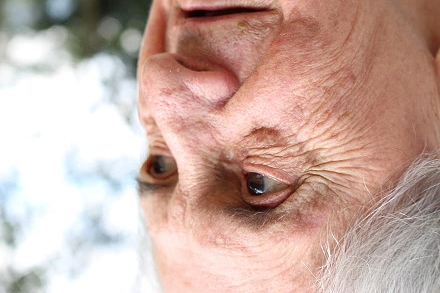

In [ ]:
# XY-Flip -1
dst1 = cv.flip(img, -1)
cv2_imshow(dst1)

## Draw Geometry

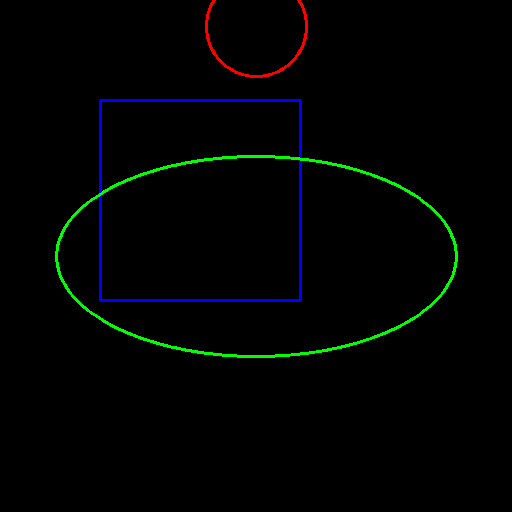

In [ ]:
img = np.zeros((512, 512, 3),dtype=np.uint8)
cv.rectangle(img, (100,100),(300,300),(255,0,0),2,cv.LINE_8,0)
cv.circle(img, (256,26),50,(0,0,255),2, cv.LINE_8,0)
cv.ellipse(img, (256,256),(200,100),360,0,360,(0,255,0),2,cv.LINE_8,0)
cv2_imshow(img)

## Thresholding

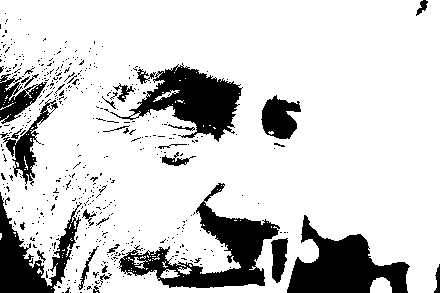

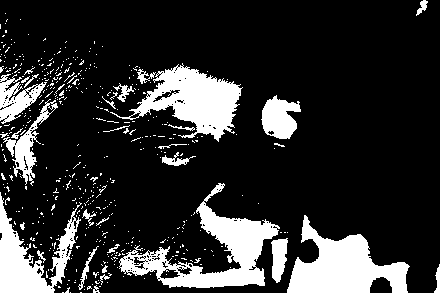

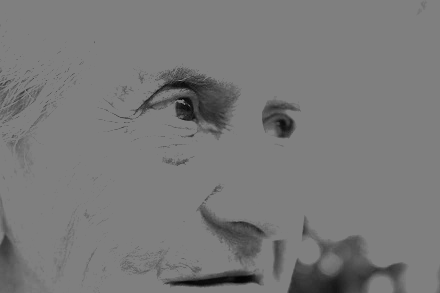

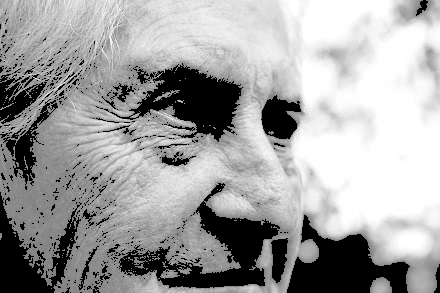

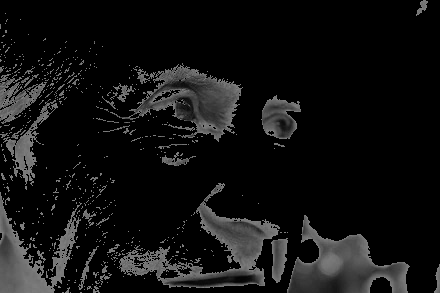

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/datasets/OpenCV-pic/"
img = cv.imread(path + "women-face.jpg")
th = 127
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
for i in range(5):
  ret, binary = cv.threshold(img_gray, th, 255, i)
  cv2_imshow(binary)

# HSV Color

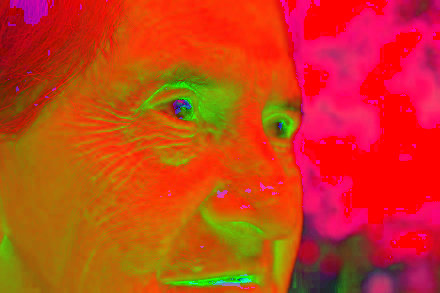

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/datasets/OpenCV-pic/"
img = cv.imread(path + "women-face.jpg")
hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
cv2_imshow(hsv_img)

# Geometric

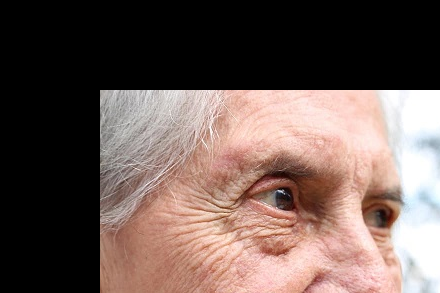

In [ ]:
 # Shifting
path = "/content/drive/MyDrive/Colab Notebooks/datasets/OpenCV-pic/"
img = cv.imread(path + "women-face.jpg")
rows = img.shape[0]
cols = img.shape[1]
M =np.float32([[1,0,100], [0,1,90]])
shifted = cv.warpAffine(img, M, (cols, rows))
cv2_imshow(shifted)

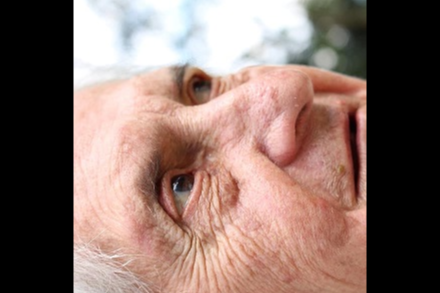

In [ ]:
# rotation
path = "/content/drive/MyDrive/Colab Notebooks/datasets/OpenCV-pic/"
img = cv.imread(path + "women-face.jpg")
rows = img.shape[0]
cols = img.shape[1]
M = cv.getRotationMatrix2D((cols/2, rows/2),90,1)
rotation = cv.warpAffine(img, M, (cols, rows))
cv2_imshow(rotation)

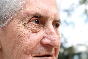

In [ ]:
# scaling
path = "/content/drive/MyDrive/Colab Notebooks/datasets/OpenCV-pic/"
img = cv.imread(path + "women-face.jpg")
img = cv.resize(img, None, fx=0.2, fy=0.2, interpolation=cv.INTER_CUBIC)
cv2_imshow(img)

# ROI (Region of Intereset)

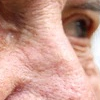

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/datasets/OpenCV-pic/"
img = cv.imread(path + "women-face.jpg")
h, w = img.shape[:2]
roi = img[100:200, 200:300, :]
cv2_imshow(roi)

# Histogram

In [ ]:
# Gray Histogram
def gray_hist(gray_img):
  h, w = gray_img.shape
  hist = np.zeros([256], dtype=np.int32)
  for row in range(h):
    for col in range(w):
      pv = gray_img[row, col]
      hist[pv]+=1
  y_pos = np.arange(0, 256, 1, dtype=np.int32)
  plt.bar(y_pos, hist, align="center", color="r", alpha=0.5)
  plt.xticks(y_pos, y_pos)
  plt.ylabel("Frequency")
  plt.ylabel("Histogram")
  plt.show()

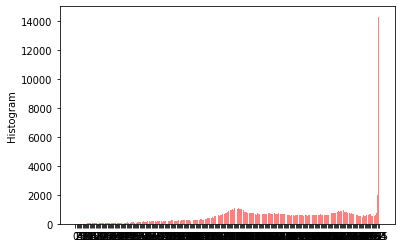

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/datasets/OpenCV-pic/"
img = cv.imread(path + "women-face.jpg")
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_hist(gray_img)

In [ ]:
# RGB Histogram
def rgb_hist(rgb_img):
  color = ("blue", "green","red")
  for i, color in enumerate(color):
    hist = cv.calcHist([rgb_img], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
    plt.show()

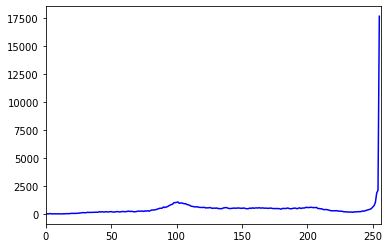

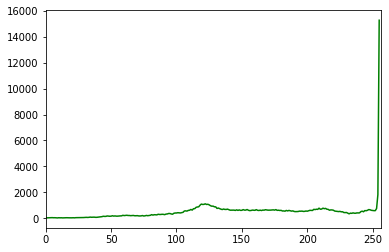

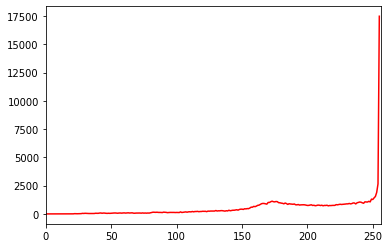

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/datasets/OpenCV-pic/"
img = cv.imread(path + "women-face.jpg")
rgb_hist(img)

# Equal Histogram

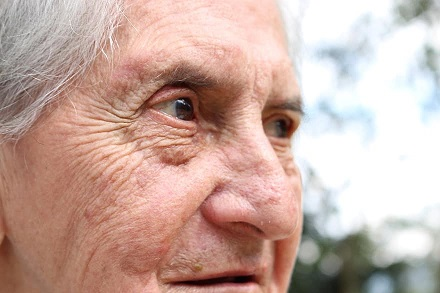

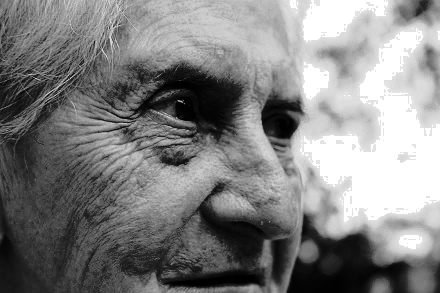

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/datasets/OpenCV-pic/"
img = cv.imread(path + "women-face.jpg")
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
dst = cv.equalizeHist(gray_img)
cv2_imshow(img)
cv2_imshow(dst)

# Histogram Comparision

In [ ]:
# imread
img1 = cv.imread("/content/drive/MyDrive/Colab Notebooks/datasets/OpenCV-pic/women-face.jpg")
img2 = cv.imread("/content/drive/MyDrive/Colab Notebooks/datasets/OpenCV-pic/gm-face.jpg")
img3 = cv.imread("/content/drive/MyDrive/Colab Notebooks/datasets/OpenCV-pic/gm-2-face.jpg")

# cvtColor
hsv1 = cv.cvtColor(img1, cv.COLOR_BGR2HSV)
hsv2 = cv.cvtColor(img2, cv.COLOR_BGR2HSV)
hsv3 = cv.cvtColor(img3, cv.COLOR_BGR2HSV)

# calcHist
hist1 = cv.calcHist([hsv1], [0, 1], None, [60, 64], [0, 180, 0, 256])
hist2 = cv.calcHist([hsv2], [0, 1], None, [60, 64], [0, 180, 0, 256])
hist3 = cv.calcHist([hsv3], [0, 1], None, [60, 64], [0, 180, 0, 256])

# normalize
cv.normalize(hist1, hist1, 0, 1.0, cv.NORM_MINMAX)
cv.normalize(hist2, hist2, 0, 1.0, cv.NORM_MINMAX)
cv.normalize(hist3, hist3, 0, 1.0, cv.NORM_MINMAX)

# compareHist
print("hist1 & hist2: ", cv.compareHist(hist1, hist2, cv.HISTCMP_CORREL))
print("hist1 & hist3: ", cv.compareHist(hist1, hist3, cv.HISTCMP_CORREL))
print("hist2 & hist3: ", cv.compareHist(hist2, hist3, cv.HISTCMP_CORREL))

hist1 & hist2:  0.5681211874156997
hist1 & hist3:  0.5119412515520336
hist2 & hist3:  0.23947296670185625


# Bilateral Filter

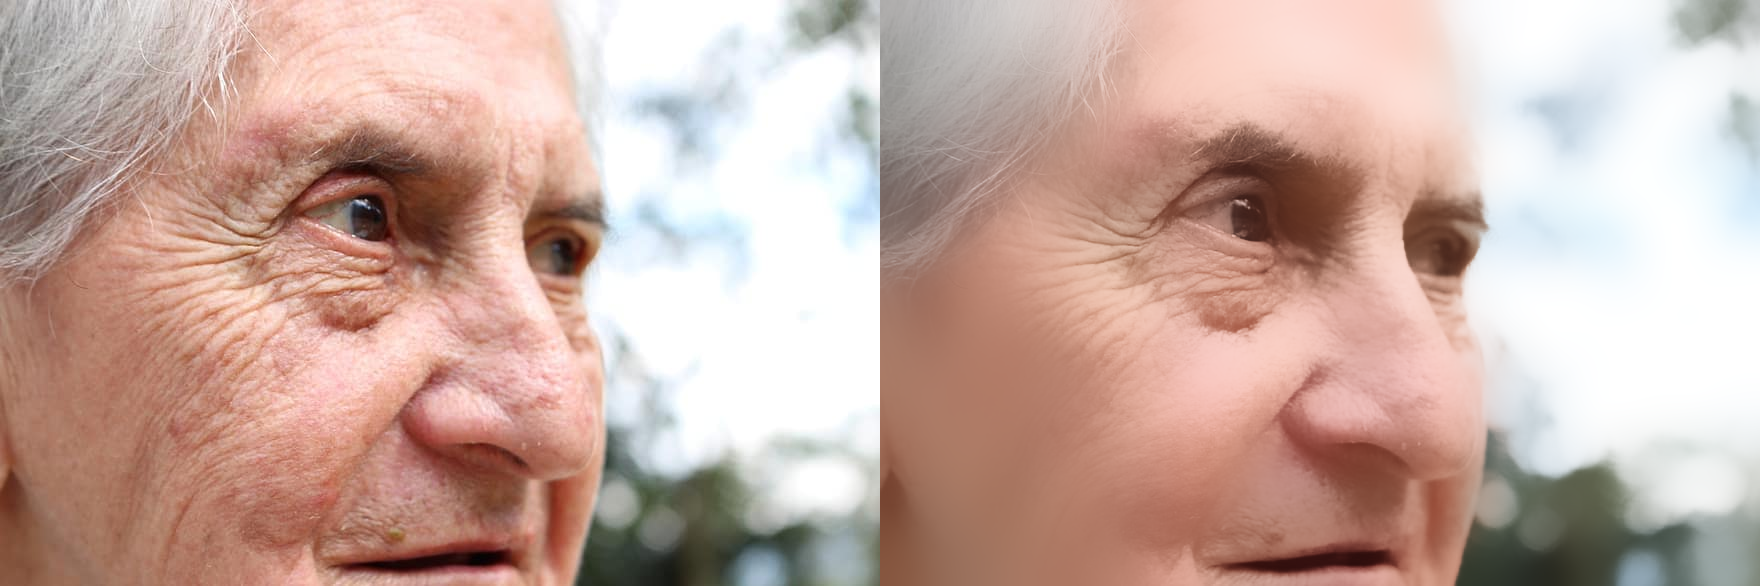

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/datasets/OpenCV-pic/"
img = cv.imread(path + "women-face.jpg")
dst = cv.bilateralFilter(img, 0, 100, 30)
h, w = img.shape[:2]
result = np.zeros([h, w*2, 3], dtype=img.dtype)
result[0:h, 0:w, :] = img
result[0:h, w:2*w, :] = dst
cv2_imshow(result)

# Edge Filtering

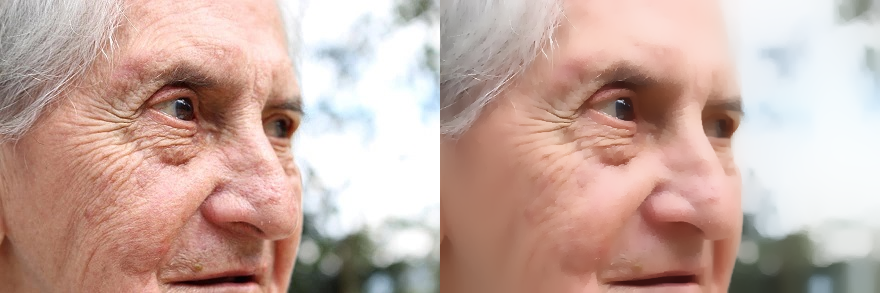

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/datasets/OpenCV-pic/"
img = cv.imread(path + "women-face.jpg")
dst = cv.edgePreservingFilter(img, sigma_s=50, sigma_r=0.4, flags=cv.RECURS_FILTER)
h, w = img.shape[:2]
result = np.zeros([h, w*2, 3], dtype=img.dtype)
result[0:h, 0:w, :] = img
result[0:h, w:2*w, :] = dst
cv2_imshow(result)

# Sobel Filter

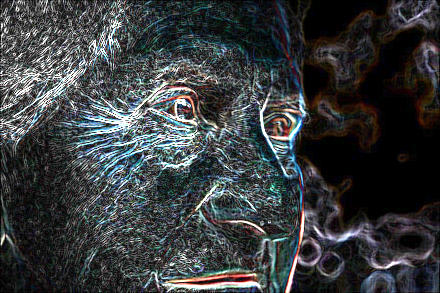

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/datasets/OpenCV-pic/"
img = cv.imread(path + "women-face.jpg")
h, w = img.shape[:2]
x_grade = cv.Sobel(img, cv.CV_32F, 1, 0)
y_grade = cv.Sobel(img, cv.CV_32F, 0, 1)
x_grade = cv.convertScaleAbs(x_grade)
y_grade = cv.convertScaleAbs(y_grade)
dst =cv.add(x_grade, y_grade, dtype=cv.CV_16S)
dst = cv.convertScaleAbs(dst)
cv2_imshow(dst)

# Canny Edge Detection

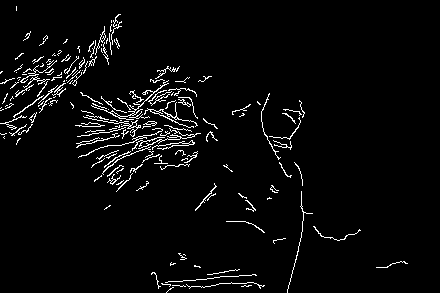

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/datasets/OpenCV-pic/"
img = cv.imread(path + "women-face.jpg")
dst = cv.Canny(img, 150, 300)
cv2_imshow(dst)

# OTSU Thresholding

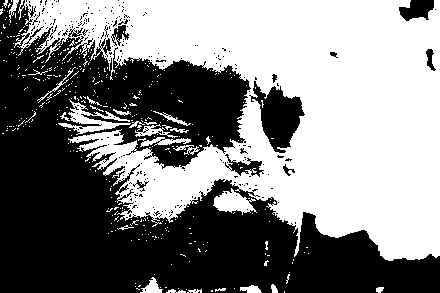

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/datasets/OpenCV-pic/"
img = cv.imread(path + "women-face.jpg")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, binary = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
cv2_imshow(binary)

# Gaussian Blur

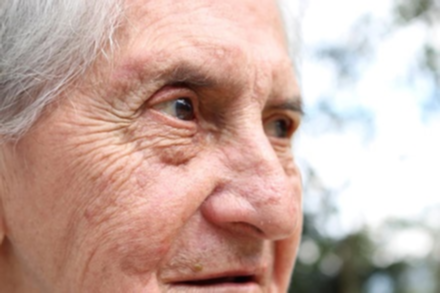

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/datasets/OpenCV-pic/"
img = cv.imread(path + "women-face.jpg")
dst = cv.GaussianBlur(img, (3,3), 0)
cv2_imshow(dst)

# Image Contours

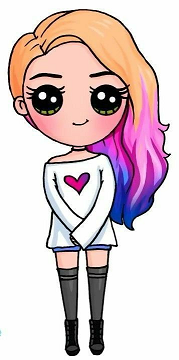

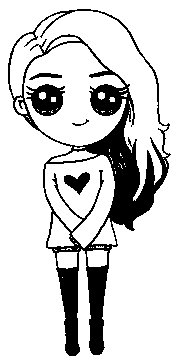

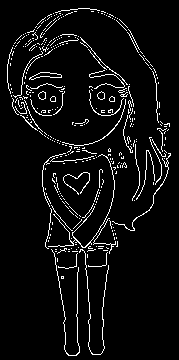

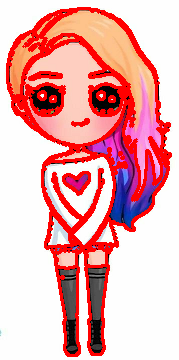

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/datasets/OpenCV-pic/"
img = cv.imread(path + "girl.png")
cv2_imshow(img)

def threshold_demo(img_path):
  dst = cv.GaussianBlur(img_path, (3,3), 0)
  gray_img = cv.cvtColor(img_path, cv.COLOR_BGR2GRAY)
  ret, binary = cv.threshold(gray_img, 0, 255, cv.THRESH_OTSU | cv.THRESH_BINARY)
  cv2_imshow(binary)
  return binary

def canny_demo(img_path):
  t = 100
  canny_output = cv.Canny(img_path, t, t*2)
  cv2_imshow(canny_output)
  return canny_output

binary = threshold_demo(img)
canny = canny_demo(binary)
contours, hierarchy = cv.findContours(canny, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

for c in range(len(contours)):
  cv.drawContours(img, contours, c, (0,0,255), 2, 8)

cv2_imshow(img)

# Hoffman Line Detection

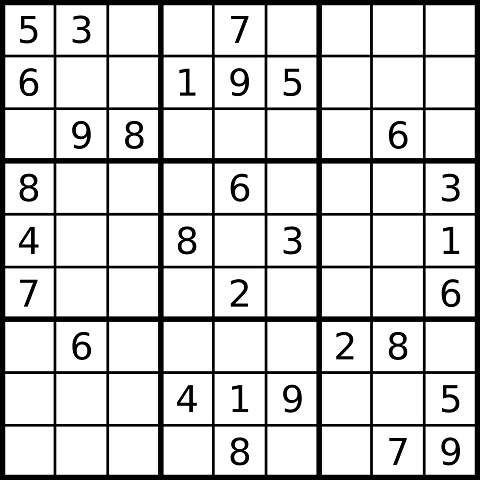

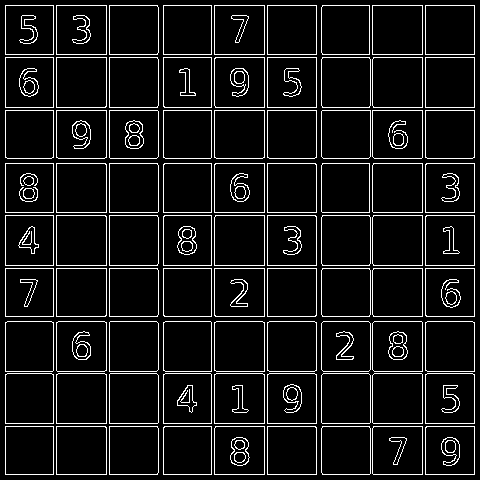

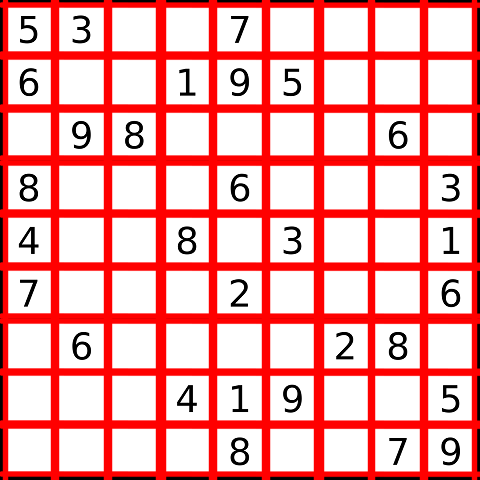

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/datasets/OpenCV-pic/"
img = cv.imread(path + "sudoku.png")
cv2_imshow(img)

def canny_demo(img_path):
  t = 100
  canny_output = cv.Canny(img_path, t, t*2)
  cv2_imshow(canny_output)
  return canny_output

binary = canny_demo(img)

lines = cv.HoughLines(binary, 1, np.pi/180, 150, None, 0, 0)
if lines is not None:
  for i in range(0, len(lines)):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0+1000*(-b)), int(y0+1000*(a)))
    pt2 = (int(x0-1000*(-b)), int(y0-1000*(a)))
    cv.line(img, pt1, pt2, (0,0,255), 3, cv.LINE_AA)
  
cv2_imshow(img)

# Probability Hoffman Line Detection

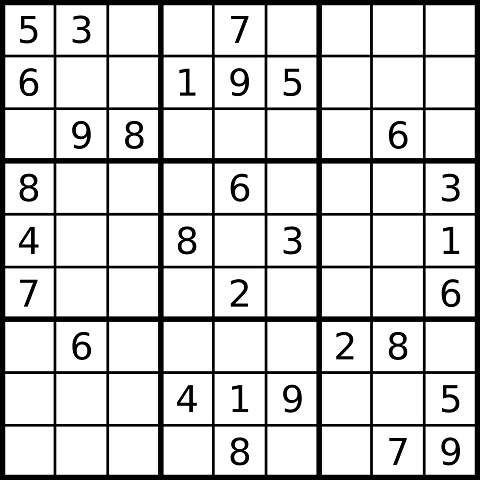

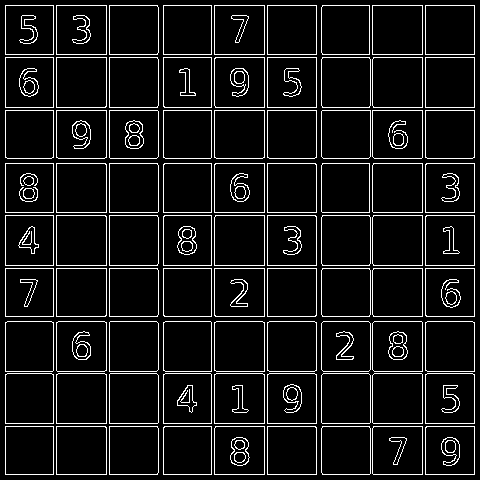

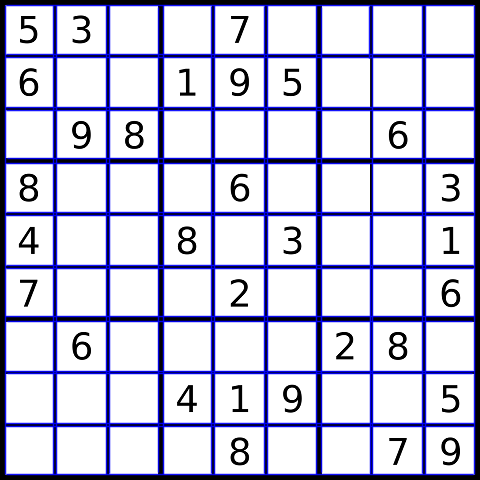

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/datasets/OpenCV-pic/"
img = cv.imread(path + "sudoku.png")
cv2_imshow(img)

def canny_demo(img_path):
  t = 100
  canny_output = cv.Canny(img_path, t, t*2)
  cv2_imshow(canny_output)
  return canny_output

binary = canny_demo(img)
linesP = cv.HoughLinesP(binary, 1, np.pi/180, 55, None, 50, 10)
cv.HoughLinesP
if linesP is not None:
  for i in range(0, len(linesP)):
    l = linesP[i][0]
    cv.line(img, (l[0], l[1]), (l[2], l[3]), (255,0,0), 1, cv.LINE_AA)

cv2_imshow(img)

# Hoffman Circle Detection

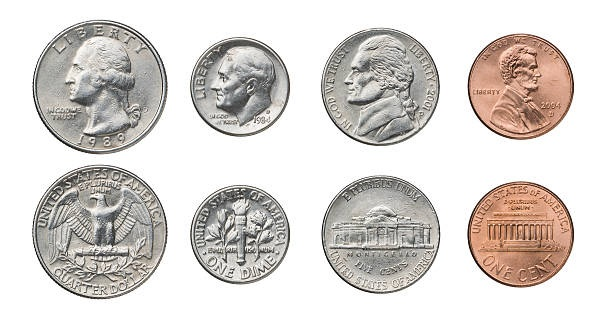

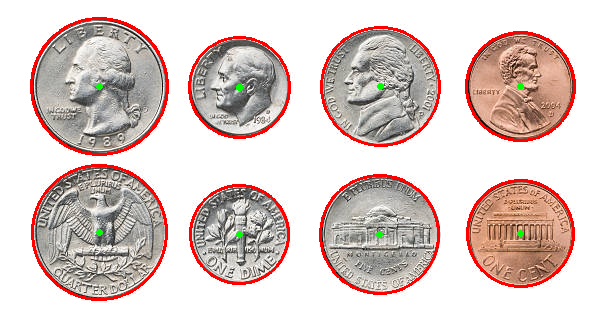

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/datasets/OpenCV-pic/"
img = cv.imread(path + "coins.jpg")
cv2_imshow(img)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_gray = cv.GaussianBlur(img_gray, (9,9), 2, 2)
circles = cv.HoughCircles(img_gray, cv.HOUGH_GRADIENT, dp=1, minDist=10, param1=150, param2=50, minRadius=20, maxRadius=100)
for c in circles[0,:]:
  cx, cy, r = c
  cv.circle(img, (int(cx), int(cy)), 2, (0,255,0), 2, 8, 0)
  cv.circle(img, (int(cx), int(cy)), int(r), (0,0,255), 2, 8, 0)

cv2_imshow(img)

# Adding Noise to an Image

In [ ]:
def add_salt_paper_noise(img):
  h, w = img.shape[:2]
  nums = 10000
  rows = np.random.randint(0, h, nums, dtype=np.int32)
  cols = np.random.randint(0, w, nums, dtype=np.int32)
  for i in range(nums):
    if i % 2 == 1:
      img[rows[i], cols[i]] = (255, 255, 255)
    else:
      img[rows[i], cols[i]] = (0, 0, 0)
  return img

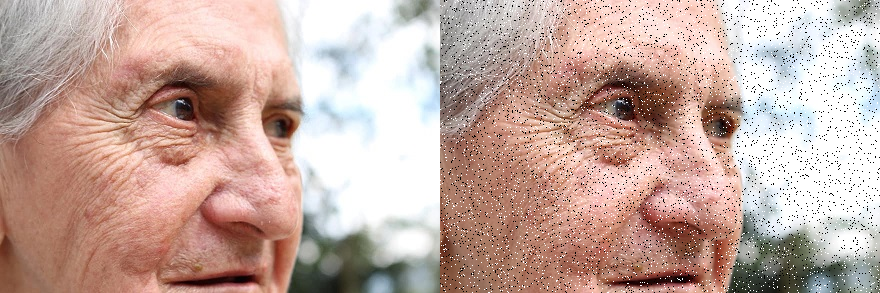

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/datasets/OpenCV-pic/"
img = cv.imread(path + "women-face.jpg")
h, w = img.shape[:2]
copy_img = np.copy(img)
dst = add_salt_paper_noise(copy_img)
result = np.zeros([h, w*2, 3], dtype=img.dtype)
result[0:h, 0:w, :] = img
result[0:h, w:2*w, :] = dst
cv2_imshow(result)

# Image Sharpening

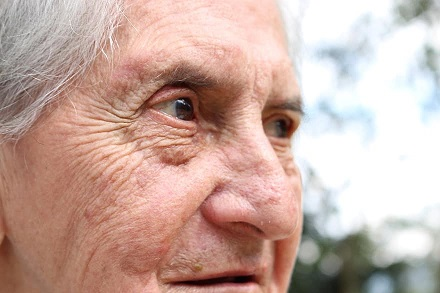

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/datasets/OpenCV-pic/"
img = cv.imread(path + "women-face.jpg")
sharpen_op = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]], dtype=np.float32)
sharpen_image = cv.filter2D(img, cv.CV_32F, sharpen_op)
sharpen_image = cv.convertScaleAbs(sharpen_image)
cv2_imshow(img)

# Harris Corner Detection

In [ ]:
def harris(image):
  blockSize = 2
  apertureSize = 3
  k = 0.04
  gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  dst = cv.cornerHarris(gray, blockSize, apertureSize, k)
  dst_norm = np.empty(dst.shape, dtype=np.float32)
  cv.normalize(dst, dst_norm, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)

  for i in range(dst_norm.shape[0]):
    for j in range(dst_norm.shape[1]):  
      if int(dst_norm[i, j]) > 120:
        cv.circle(image, (j, i), 2, (0, 255, 0), 2)
  
  return image

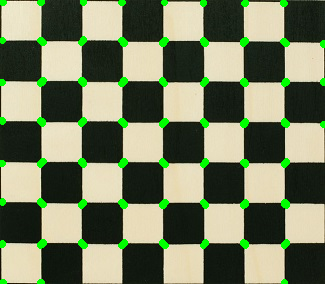

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/datasets/OpenCV-pic/"
img = cv.imread(path + "ches.jpg")
result = harris(img)
cv2_imshow(result)

# Shi Thomas Corner Detection

In [ ]:
def shi_thomas(image):
  gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  corners = cv.goodFeaturesToTrack(gray, maxCorners=50, qualityLevel=0.1, minDistance=10)
  for pt in corners:
    b = np.random.randint(0, 256)
    g = np.random.randint(0, 256)
    r = np.random.randint(0, 256)
    x = np.int32(pt[0][0])
    y = np.int32(pt[0][1])
    cv.circle(image, (x, y), 5, (int(b), int(g), int(r)), 2)
  
  return image

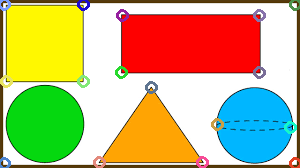

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/datasets/OpenCV-pic/"
img = cv.imread(path + "math-pic.png")
result = shi_thomas(img)
cv2_imshow(result)

# Sub Pixel Corner Detection

In [ ]:
def sub_pixel(image):
  gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  corners = cv.goodFeaturesToTrack(gray, maxCorners=50, qualityLevel=0.1, minDistance=10)
  for pt in corners:
    b = np.random.randint(0, 256)
    g = np.random.randint(0, 256)
    r = np.random.randint(0, 256)
    x = np.int32(pt[0][0])
    y = np.int32(pt[0][1])
    cv.circle(image, (x, y), 5, (int(b), int(g), int(r)), 2)
  
  winSize = (3, 3)
  zeroZone = (-1, -1)
  criteria = (cv.TERM_CRITERIA_EPS + cv.TermCriteria_COUNT, 40, 0.001)
  corners = cv.cornerSubPix(gray, corners, winSize, zeroZone, criteria)
  
  return image

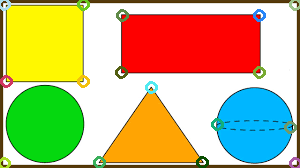

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/datasets/OpenCV-pic/"
img = cv.imread(path + "math-pic.png")
result = sub_pixel(img)
cv2_imshow(result)

# HOG(Histogram of Oriented Gradients) Pedestrian Detection

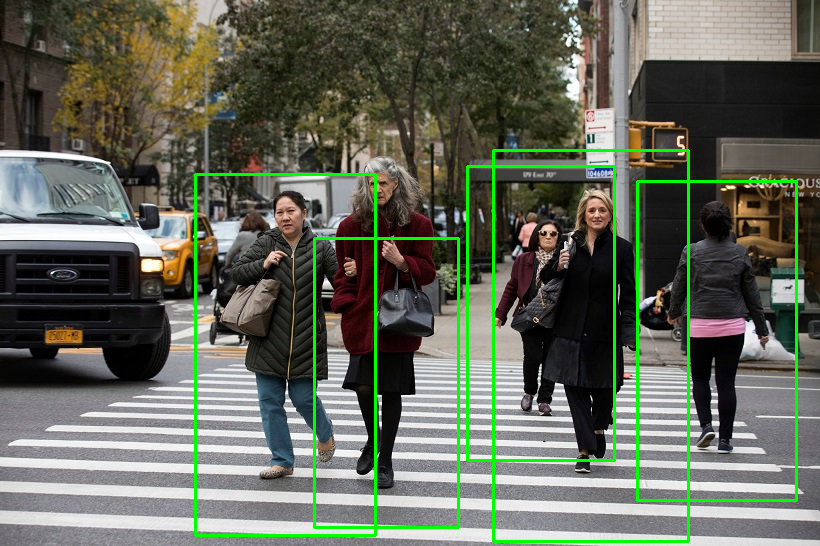

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/datasets/OpenCV-pic/"
img = cv.imread(path + "pedestrian.jpg")
hog = cv.HOGDescriptor()
hog.setSVMDetector(cv.HOGDescriptor_getDefaultPeopleDetector())
rects, wights = hog.detectMultiScale(img, winStride=(4,4), padding=(8,8), scale=1.25)
for (x,y,w,h) in rects:
  cv.rectangle(img, (x,y), (x+w, y+h), (0,255,0),2)

cv2_imshow(img)

# Object Detection: Template Mathcing

In [32]:
def template_matching2(img, img_template, threshold=0.98):
  th,tw = img_template.shape[:2]
  result = cv.matchTemplate(img, img_template, method=cv.TM_CCORR_NORMED)
  loc=np.where(result>threshold)
  for pt in zip(*loc[::-1]):
    cv.rectangle(img, pt, (pt[0]+tw , pt[1]+th), (255,0,0), 1, 8, 0)
  cv2_imshow(img)

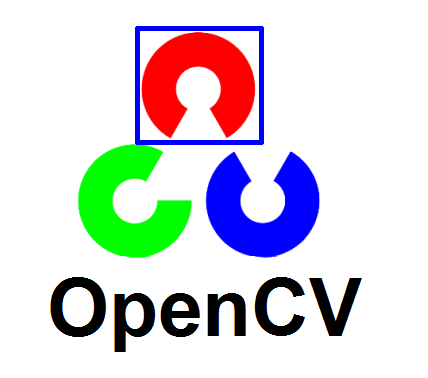

In [33]:
path = "/content/drive/MyDrive/Colab Notebooks/datasets/OpenCV-pic/"
img = cv.imread(path + "opencv-logo.png")
img_template = cv.imread(path + "template.png")
template_matching2(img, img_template)